# Sueño

## 1. Definición del Problema de Machine Learning

El objetivo del siguiente trabajo es predecir la calidad de sueño de una persona basándonos en datos como duración del sueño, niveles de estrés, nivel de actividad física durante el día (ya sea caminando o haciendo deporte), etc.

El target (calidad de sueño) consiste en un conjunto de valores discretos multiclase (marcados con valores que van del 1 al 5).

Las métricas principales de clasificación son: F1-score, precisión, recall o accuracy.

La métrica secundaria es la matriz de confusión para ver qué clases se confunden más.

**Impacto del proyecto**
- Si el modelo predice una mala calidad del sueño, el sector hospitalario podrá establecer medidas personalizadas acorde a los problemas de las personas.
- Esto podría mejorar la satisfacción del usuario, reduciendo problemas de salud relacionados con el sueño y mejorando la productividad en su día a día.
- Tener una un sueño reparador puede evitar accidentes de tráfico, lo que puede ayudar a salvar vidas.

Los **requisitos mínimos** de rendimiento serán:
- El modelo debe alcanzar al menos un 80% de precisión en la exactitud de los datos (si es de 90% o más sería muy bueno) siempre y cuando las clases estén balanceadas.
- Los valores de F1-score deben tener un mínimo de 0.60 para ser aceptables, si tiene 0.70 serán buenos y si son mayores a 0.80 será excelente.
- La matriz de confusión será buena si no comete errores graves en las clases importantes.

## 2. Recolección y Exploración de Datos

1. Obtener el dataset completo
2. Realizar análisis exploratorio inicial:
   - Dimensiones del dataset
   - Tipos de datos
   - Estadísticas descriptivas básicas
   - Distribución de variables
   - Correlaciones
3. Verificar la calidad de los datos:
   - Identificar valores faltantes
   - Detectar inconsistencias
   - Verificar el balance de clases (para clasificación)
   - Identificar posibles errores en los datos

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../data/raw/Sleep.csv')

In [3]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## Comprensión de variables

## Feat. Red. Preliminar

## Análisis Univariante

## 3. Preprocesamiento de Datos Inicial

1. Eliminar duplicados si existen
2. Tratar valores faltantes:
   - Decidir entre eliminar o imputar
   - Documentar la estrategia elegida
3. Identificar y tratar outliers:
   - Análisis estadístico de outliers
   - Decidir estrategia (eliminar, transformar o mantener)
4. Limpieza general de datos

## 4. Feature Engineering

1. Selección inicial de características:
   - Análisis de correlaciones
   - Importancia de variables
2. Creación de nuevas características:
   - Combinaciones de variables existentes
   - Transformaciones matemáticas
3. Aplicación de técnicas no supervisadas (si es necesario):
   - PCA para reducción de dimensionalidad
   - Clustering para nuevas features

## 5. Preparación de Datos

1. Split de datos:
   - Train/Test/Validation
   - Mantener estratificación si es necesario
2. Procesamiento de variables (fit solo en train):
   - Codificación de variables categóricas
   - Normalización/Estandarización de variables numéricas
3. Balanceo de clases (solo en train si es necesario):
   - Oversampling
   - Undersampling
   - Técnicas híbridas

### Divide en train, test y validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep quality', axis=1),
                                                    df['Sleep quality'],
                                                    test_size=0.2,
                                                    random_state=42)

### Target

NameError: name 'y_rus' is not defined

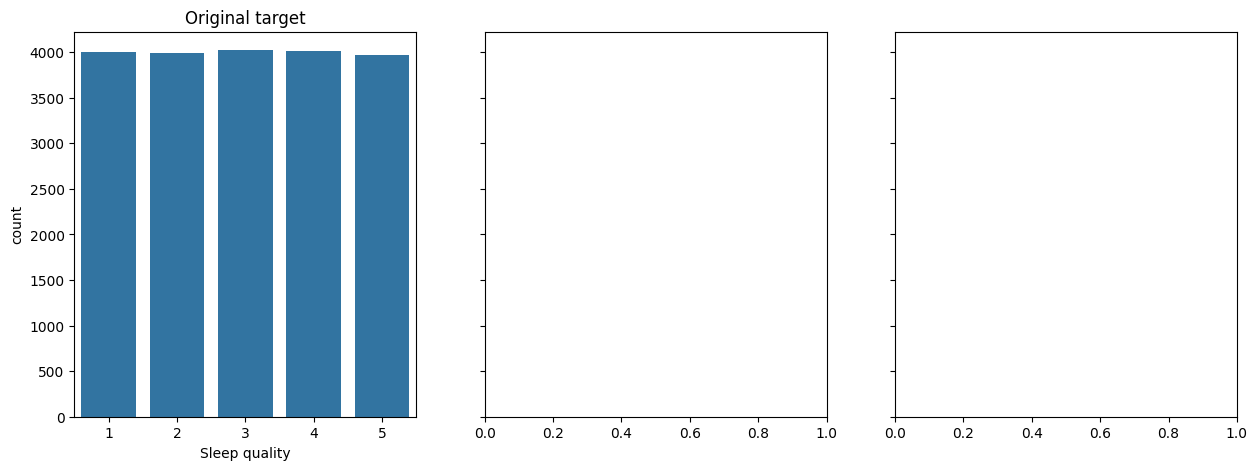

In [7]:
fig, axes = plt.subplots(1, 3, figsize= (15,5), sharey=True)

sns.countplot(x="Sleep quality", data=df, ax=axes[0])
axes[0].set_title("Original target")

sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("Random Under Sampler")

sns.countplot(y_ros, ax=axes[2])
axes[2].set_title("Random Over Sampler")

## 6. Selección de Modelos Base

1. Implementar validación cruzada para varios modelos
2. Evaluar modelos básicos según el tipo de problema
3. Comparar resultados iniciales
4. Seleccionar los 3-5 mejores modelos
5. Documentar razones de selección

## 7. Optimización de Modelos Seleccionados

1. Realizar ajuste de hiperparámetros para cada modelo:
   - Grid Search
   - Random Search
   - Bayesian Optimization
2. Evaluar resultados de cada modelo optimizado
3. Considerar ensamble de mejores modelos
4. Seleccionar el modelo final

## 8. Evaluación y Análisis

1. Evaluar métricas finales en datos de test
2. Realizar análisis detallado de errores
3. Interpretar resultados:
   - Importancia de características
   - SHAP values
   - Partial dependence plots
4. Validar supuestos del modelo
5. Analizar casos específicos de error
6. Documentar hallazgos principales

## 9. Despliegue y Documentación

1. Preparar el modelo para producción:
   - Optimizar código
   - Crear pipeline de predicción
2. Documentar todo el proceso:
   - Decisiones tomadas
   - Resultados obtenidos
   - Limitaciones encontradas
3. Establecer plan de monitoreo:
   - Métricas a seguir
   - Frecuencia de actualización
   - Procedimientos de mantenimiento

## Análisis Bivariante

## Eliminación de Features

## Duplicados

## Missings

## Anomalías y Errores

## Outliers

## Feature Engineering

## Feature Reduction

## Escoger Métrica del Modelo

## Decidir sobre los Modelos

## Elegir Hiperparámetros

## Definición de Pipelines y Probamos

## Resultados